In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from tabulate import tabulate

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load in the fits data

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
#print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


In [3]:
stars

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
0,1636-283,0,6032349260227596544,0,0.747692,249.708525,0.201080,-28.585117,0.115789,351.679705,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1,1636-283,0,6032358331198284160,1,1.000000,249.866424,0.020684,-28.402037,0.013691,351.914287,...,8.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
2,1636-283,0,6032358331198285696,1,0.843798,249.865221,0.046356,-28.399406,0.029595,351.915643,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
3,1636-283,0,6032358331198286080,1,1.000000,249.861159,0.045101,-28.400698,0.030237,351.912273,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
4,1636-283,0,6032358670488486784,1,1.000000,249.939480,0.038724,-28.429366,0.023344,351.935370,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291924,vdBergh_92,7163,3045840104515988992,1,1.000000,106.116546,0.110176,-11.474387,0.111851,224.621323,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291925,vdBergh_92,7163,3045840074455065088,1,0.838193,106.136236,0.049847,-11.471452,0.049169,224.627544,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291926,vdBergh_92,7163,3045840074453671680,1,0.639341,106.135606,0.056229,-11.468653,0.058581,224.624770,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,VARIABLE,0,0
1291927,vdBergh_92,7163,3045840654267074048,1,0.738133,106.159649,0.058318,-11.436082,0.062037,224.606570,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0


In [4]:
#number of stars in each cluster
clcounts = stars.groupby(['Name']).size().reset_index(name='count')
clcounts

,Name,count
0,1636-283,38
1,ADS_16795,41
2,AH03_J0748+26.9,68
3,ASCC_100,87
4,ASCC_101,224
...,...,...
7162,vdBergh_152,25
7163,vdBergh_80,93
7164,vdBergh_83,92
7165,vdBergh_85,105


In [5]:
#stars

Use dataframe.sample function to sample 4 clusters with more than 1000 stars

In [6]:

def sample_n_clusters(clusters, sample_size,count):
    '''Select n number of clusters to sample, clusters must have more than 1000 members
    for each run of this cell the clusters are randomized
    input: 
    clusters: panda dataframe of clustes
    sample_size: int number of clusters to sample n
    count: number of memebers in a cluster
    
    return:
    df of sample clusters with more than 1000 stars'''
    sample_cluster = clusters[clusters['count'] >count].sample(n=sample_size)
    return sample_cluster
sample_size  = 4
my_sample_cluster = sample_n_clusters(clcounts,sample_size,1000)
print(my_sample_cluster.Name)



4479      NGC_1912
4704      NGC_6259
4678      NGC_6121
4429    Melotte_66
Name: Name, dtype: object


In [7]:
#here im testing how iloc works
my_sample_cluster.Name.iloc[0]
my_sample_cluster.Name.iloc[3]

'Melotte_66'

Find stars with prob 0.8 first I  most likely have to store the cluster names in a variable first

In [8]:
def sampled_cluster_names(sampled_cluster,sample_size):
    '''Assign the cluster names into a dictionary and assign them a key: 
    sampled_clusters: panda dataframe of clusters from sample_n_clusters function
    sample_size: int number of clusters to sample n
    
    return:
    dictionay of sampled clusters'''
    N = sample_size 
    dict = {}
    cluster_key = 'Cluster '
    for i in range(0,N):
        #indexing starts counting from zero i want to start from 1
        dict[cluster_key+str(i+1)] = sampled_cluster.iloc[i]
    return dict
cluster_names = sampled_cluster_names(my_sample_cluster,sample_size)

In [9]:
cluster_names

{'Cluster 1': Name     NGC_1912
 count        1072
 Name: 4479, dtype: object,
 'Cluster 2': Name     NGC_6259
 count        2188
 Name: 4704, dtype: object,
 'Cluster 3': Name     NGC_6121
 count       22191
 Name: 4678, dtype: object,
 'Cluster 4': Name     Melotte_66
 count          1711
 Name: 4429, dtype: object}

Below i copied the code from the website on Working with and plotting large multivariate data sets and modified it to accept the cluster data. I take a sample cluster from above and add a new dataframe column for color. If the probabilty is greater than 0.8 the dot is blue, if not it is orange. 

/tmp/ipykernel_7591/1710229182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


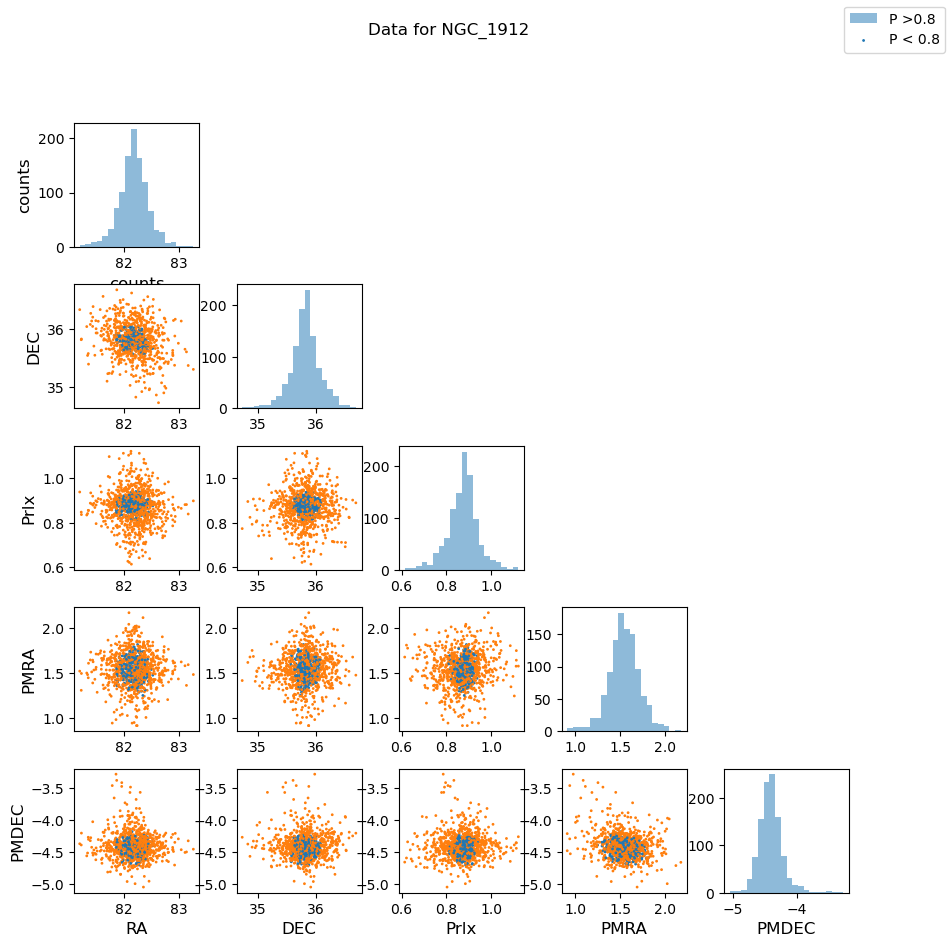

In [10]:
def breakdown(sample_index, sampled_clusters, stars):
    '''Plot the RA, DEC, Proper motion and parallax of a sampled cluster'''
    #take a sample cluster by indexing the sample cluster list
    label=['P >0.8', 'P < 0.8']
    test_cluster = sampled_clusters.Name.iloc[int(sample_index)]
    #find all the stars in the cluster
    temp_df = stars[stars['Name'].str.contains(test_cluster, case=False)]
    #filter and color by probability
    temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')
    #labels for axes
    labels = ['RA','DEC','Prlx','PMRA','PMDEC']
    #select the data i want to plot
    data = [temp_df['RAdeg'], temp_df['DEdeg'], temp_df['Plx'], temp_df['pmRA'], temp_df['pmDE']]
    ndims = len(data)
    fig, axes = plt.subplots(5,5,figsize=(10,10))
    fig.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle("Data for " + test_cluster)
    
    for i in range(ndims): ## y dimension of grid
        for j in range(ndims): ## x dimension of grid
            if i == j:
                axes[i,j].hist(data[i], bins=20,alpha=0.5)
            elif i > j:
                axes[i,j].scatter(data[j], data[i],color=temp_df['Color'],s=1)
            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_xlabel('counts',fontsize=12)
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=12)    
    fig.legend(labels=label)
    plt.show()
    return temp_df
first_cluster = breakdown(0,my_sample_cluster, stars)


Repeat for all 4 sampled clusters

/tmp/ipykernel_7591/1710229182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


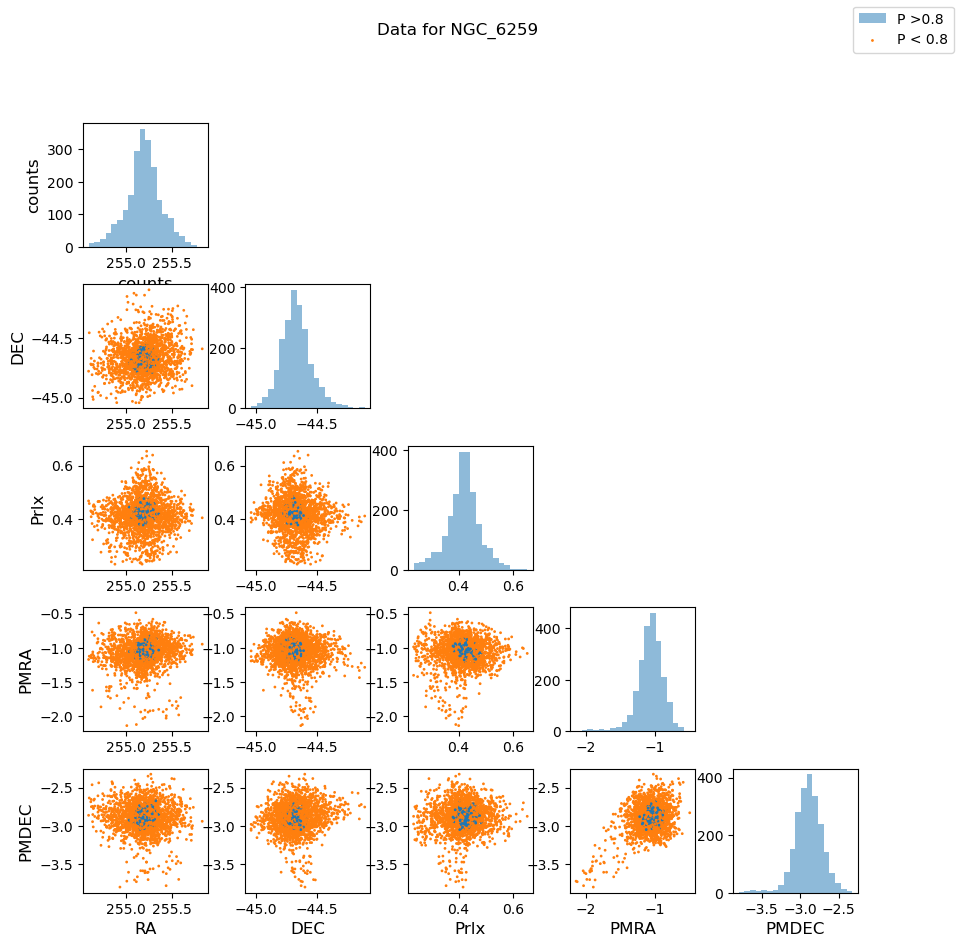

In [11]:
second_cluster = breakdown(1,my_sample_cluster, stars)

/tmp/ipykernel_7591/1710229182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


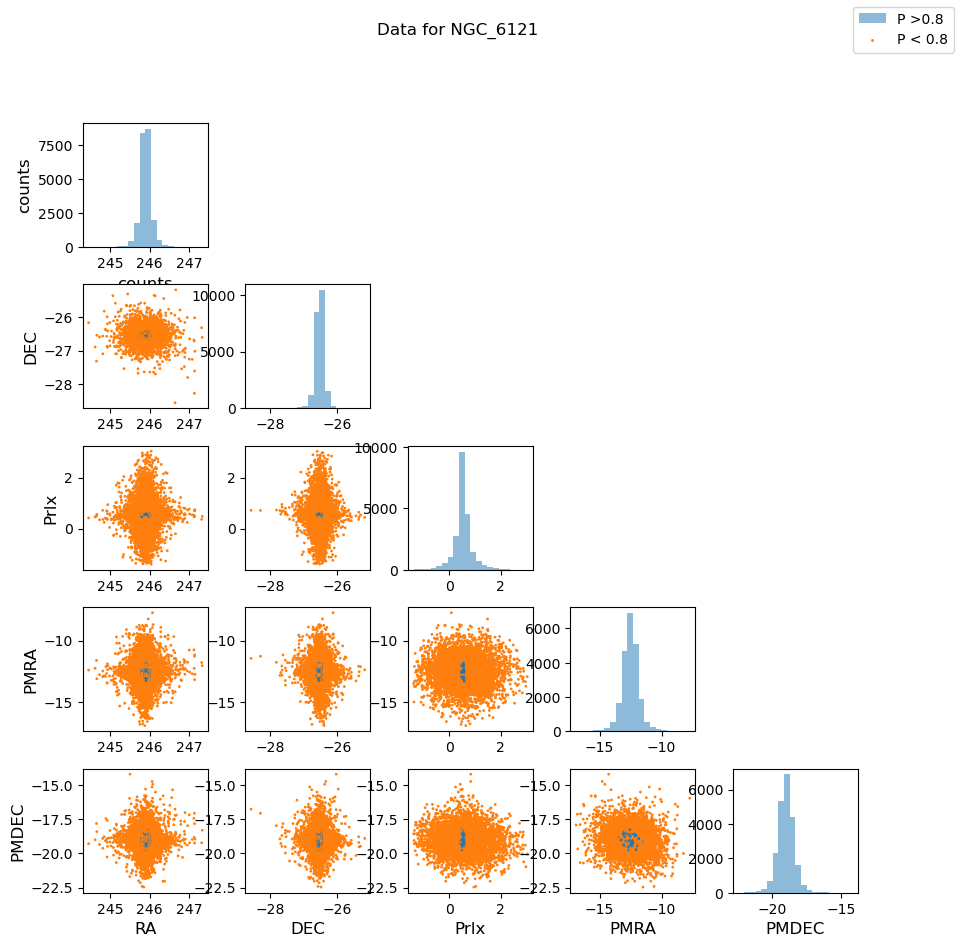

In [12]:
third_cluster = breakdown(2,my_sample_cluster, stars)

/tmp/ipykernel_7591/1710229182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Color'] = np.where(temp_df['Prob'] > 0.8, 'tab:blue', 'tab:orange')


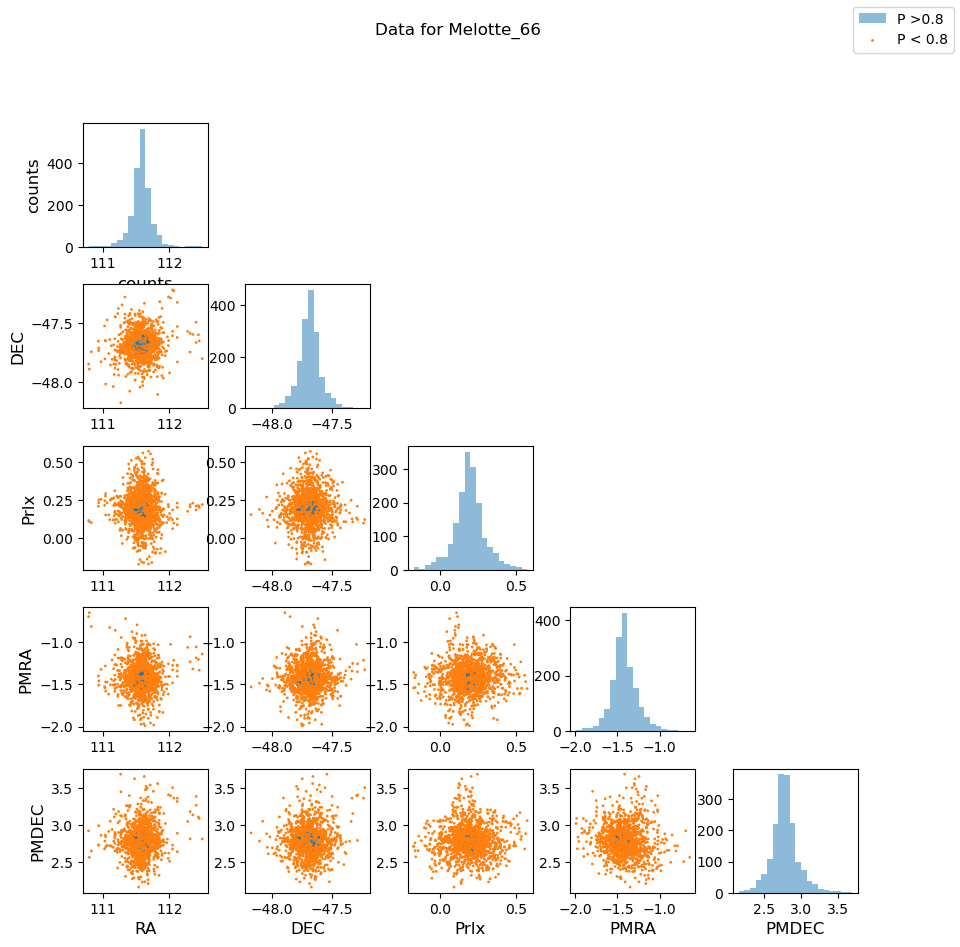

In [13]:
fourth_cluster = breakdown(3,my_sample_cluster, stars)

High Probability Analysis, study stars with P > 0.8 below is copied from assignment pdf

In [14]:
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_sd_hiprob.columns

Index(['Name', 'ID', 'GaiaDR3', 'inrt', 'Prob', 'RAdeg', 'e_RAdeg', 'DEdeg',
       'e_DEdeg', 'GLON', 'GLAT', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Plx',
       'e_Plx', 'pscol', 'e_pscol', 'PlxpmRACor', 'PlxpmDECor', 'pmRApmDECor',
       'PlxpscolCor', 'pmRApscolCor', 'pmDEpscolCor', 'Solved', 'ELAT',
       'nueff', 'RUWE', 'FidelityV1', 'FG', 'e_FG', 'FBP', 'e_FBP', 'FRP',
       'e_FRP', 'Gmag', 'BPmag', 'RPmag', 'BP-RP', 'BP-G', 'G-RP', 'RV',
       'e_RV', 'n_RV', 'o_RV', 'o_RVd', 'GRVSmag', 'e_GRVSmag', 'o_GRVSmag',
       'Vbroad', 'e_Vbroad', 'o_Vbroad', 'NSS', 'RVS'],
      dtype='object')

In [15]:

clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

In [16]:

#use sample_n_clusters function first pick a cluster with more than 200 memebers
#here i sample hiprob_count of stars
hiprob_count = 200
hiprob_200_cluster = clusters_hiprob #sample_n_clusters(clusters_hiprob, hiprob_count,200)
hiprob_200_cluster

,Name,count,sd_RAdeg,sd_DEdeg
0,1636-283,30,0.038488,0.032713
1,ADS_16795,41,5.028249,2.071391
2,AH03_J0748+26.9,28,0.029759,0.034522
3,ASCC_100,87,0.848365,0.904561
4,ASCC_101,149,0.519560,0.886064
...,...,...,...,...
7162,vdBergh_152,25,0.863601,0.201857
7163,vdBergh_80,93,0.336260,0.260737
7164,vdBergh_83,92,0.283638,0.200000
7165,vdBergh_85,105,0.107164,0.077127


In [17]:
def pick_a_cluster_by_sd(hiprob_cluster):
    '''Select a cluster with more than 200 stars, low standard deviation in ra and dec
    input:
    hiprob_cluster = pd dataframe of star clusters
    
    variables:
    max_val : float, maximium standard deviation
    count : integer, maximum number of stars
    filter_cluster: pd dataframe of clusters filtered by low standaard deviation
    
    return:
    one filter_cluster'''
    max_val = 0.1
    count = 200
    filter_cluster = hiprob_cluster[hiprob_cluster['count'] > 200]
    #filter the clusters by low stanadard deviation
    filter_cluster = filter_cluster[filter_cluster['sd_RAdeg'] < max_val]
    filter_cluster = filter_cluster[filter_cluster['sd_DEdeg'] < max_val]

    #return one cluster

    return filter_cluster
clean_cluster = pick_a_cluster_by_sd(hiprob_200_cluster)
clean_cluster # these are now all the clusters with more than 200 stars, and low standard deviation in RA and DEC

,Name,count,sd_RAdeg,sd_DEdeg
217,Berkeley_36,217,0.040135,0.048875
219,Berkeley_39,211,0.029860,0.034516
221,Berkeley_43,205,0.053164,0.051358
1315,Collinder_110,275,0.079560,0.076032
1381,Czernik_41,205,0.062116,0.059241
...,...,...,...,...
6059,Trumpler_25,245,0.045522,0.038393
6070,Trumpler_5,605,0.059707,0.056944
6091,UBC_1020,210,0.079440,0.083825
6124,UBC_106,245,0.060764,0.058970


my cluster will be Trumpler_5 for now

Sample clusters <br> 
NGC_6809	
NGC_2477	
NGC_6231	
NGC_6121
<br>
I used chatgpt to make a 2 by 5 plot template. and modified it to plot my data Chatgpt porvided the grid spaces, legends and labels

In [18]:
def spatial(clean_cluster,stars):
    '''Plot the spatial differences in a cluster seperate by the mean RA and mean DEC
    
    
    below there is  a test plot of the histograms  you can uncomment it to see but it affects the 
    Make_cluster_histograms 
    '''
    temp_df = stars[stars['Name'] == clean_cluster]
    #calculate the means
    mean_RA = temp_df['RAdeg'].mean()
    mean_DE = temp_df['DEdeg'].mean()

    #find all the values of RA below and above the mean and split them into two dataframes
    RA_below_mean  = temp_df[temp_df['RAdeg'] < mean_RA]
    RA_above_mean  = temp_df[temp_df['RAdeg'] > mean_RA]
    
    #repeat for DEC
    DE_below_mean  = temp_df[temp_df['DEdeg'] < mean_DE]
    DE_above_mean  = temp_df[temp_df['DEdeg'] > mean_DE]
    
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    
    #gather all the data i need store as numpy arrays
    RA_below_data = RA_below_mean[data_labels].to_numpy()
    RA_above_data = RA_above_mean[data_labels].to_numpy()
    #same for DEc
    DE_below_data = DE_below_mean[data_labels].to_numpy()
    DE_above_data = DE_below_mean[data_labels].to_numpy()

    #below is a test plot of the histograms  you can uncomment it to see but it affects the 


    nrows = 2
    ncols = 5
    #fig, axes = plt.subplots(2, 5, figsize=(20, 15))
    label = ['Less than Mean', 'Greater than Mean']
    bin_size = 20
    #fig.suptitle(clean_cluster+' By RA', fontsize=30)
    #plot the RA data
    # for i in range(nrows): ## y dimension of grid
    #     for j in range(ncols): ## x dimension of grid
    #         if i == 0:
    #             axes[i,j].hist(RA_below_data[j],alpha=0.5,color='tab:blue')
    #             axes[i,j].set_xlabel(data_labels[j],fontsize=15)
    #         if i ==1:
    #             axes[i,j].hist(RA_above_data[j],alpha=0.5,color='tab:orange')
    #             axes[i,0].set_ylabel('counts',fontsize=15)
    #             axes[i,j].set_xlabel(data_labels[j],fontsize=15)
    #         if j == 0:
    #             if i == j:
    #                axes[i,j].set_ylabel('counts',fontsize=15)
    # fig.legend(labels=label,fontsize=20)
    # plt.show()

    # #repeat for DEC
    # fig, axes = plt.subplots(2, 5, figsize=(20, 15))
    # label = ['Less than Mean', 'Greater than Mean']
    # bin_size = 20
    # fig.suptitle(clean_cluster+' By DEC', fontsize=30)

    # for i in range(nrows): ## y dimension of grid
    #     for j in range(ncols): ## x dimension of grid
    #         if i == 0:
    #             axes[i,j].hist(DE_below_data[j],alpha=0.5,color='tab:red')
    #             axes[i,j].set_xlabel(data_labels[j],fontsize=15)
    #         if i ==1:
    #             axes[i,j].hist(DE_above_data[j],alpha=0.5, color='tab:orange')
    #             axes[i,0].set_ylabel('counts',fontsize=15)
    #             axes[i,j].set_xlabel(data_labels[j],fontsize=15)
    #         if j == 0:
    #             if i == j:
    #                axes[i,j].set_ylabel('counts',fontsize=15)
    # fig.legend(labels=label,fontsize=20)
    # handles, labels = ax1.get_legend_handles_labels()
    # fig.legend(handles, labels)
    # plt.show()
    return RA_below_data, RA_above_data, DE_below_data, DE_above_data
RA_below_data, RA_above_data, DE_below_data, DE_above_data = spatial('Trumpler_5', stars)

NGC_6809	
NGC_2477	
NGC_6231	
NGC_6121

In [19]:
clusterA = spatial('Trumpler_5', stars)
clusterB = spatial('NGC_6809', stars)
clusterC = spatial('NGC_2477', stars)
clusterD = spatial('NGC_6121', stars)

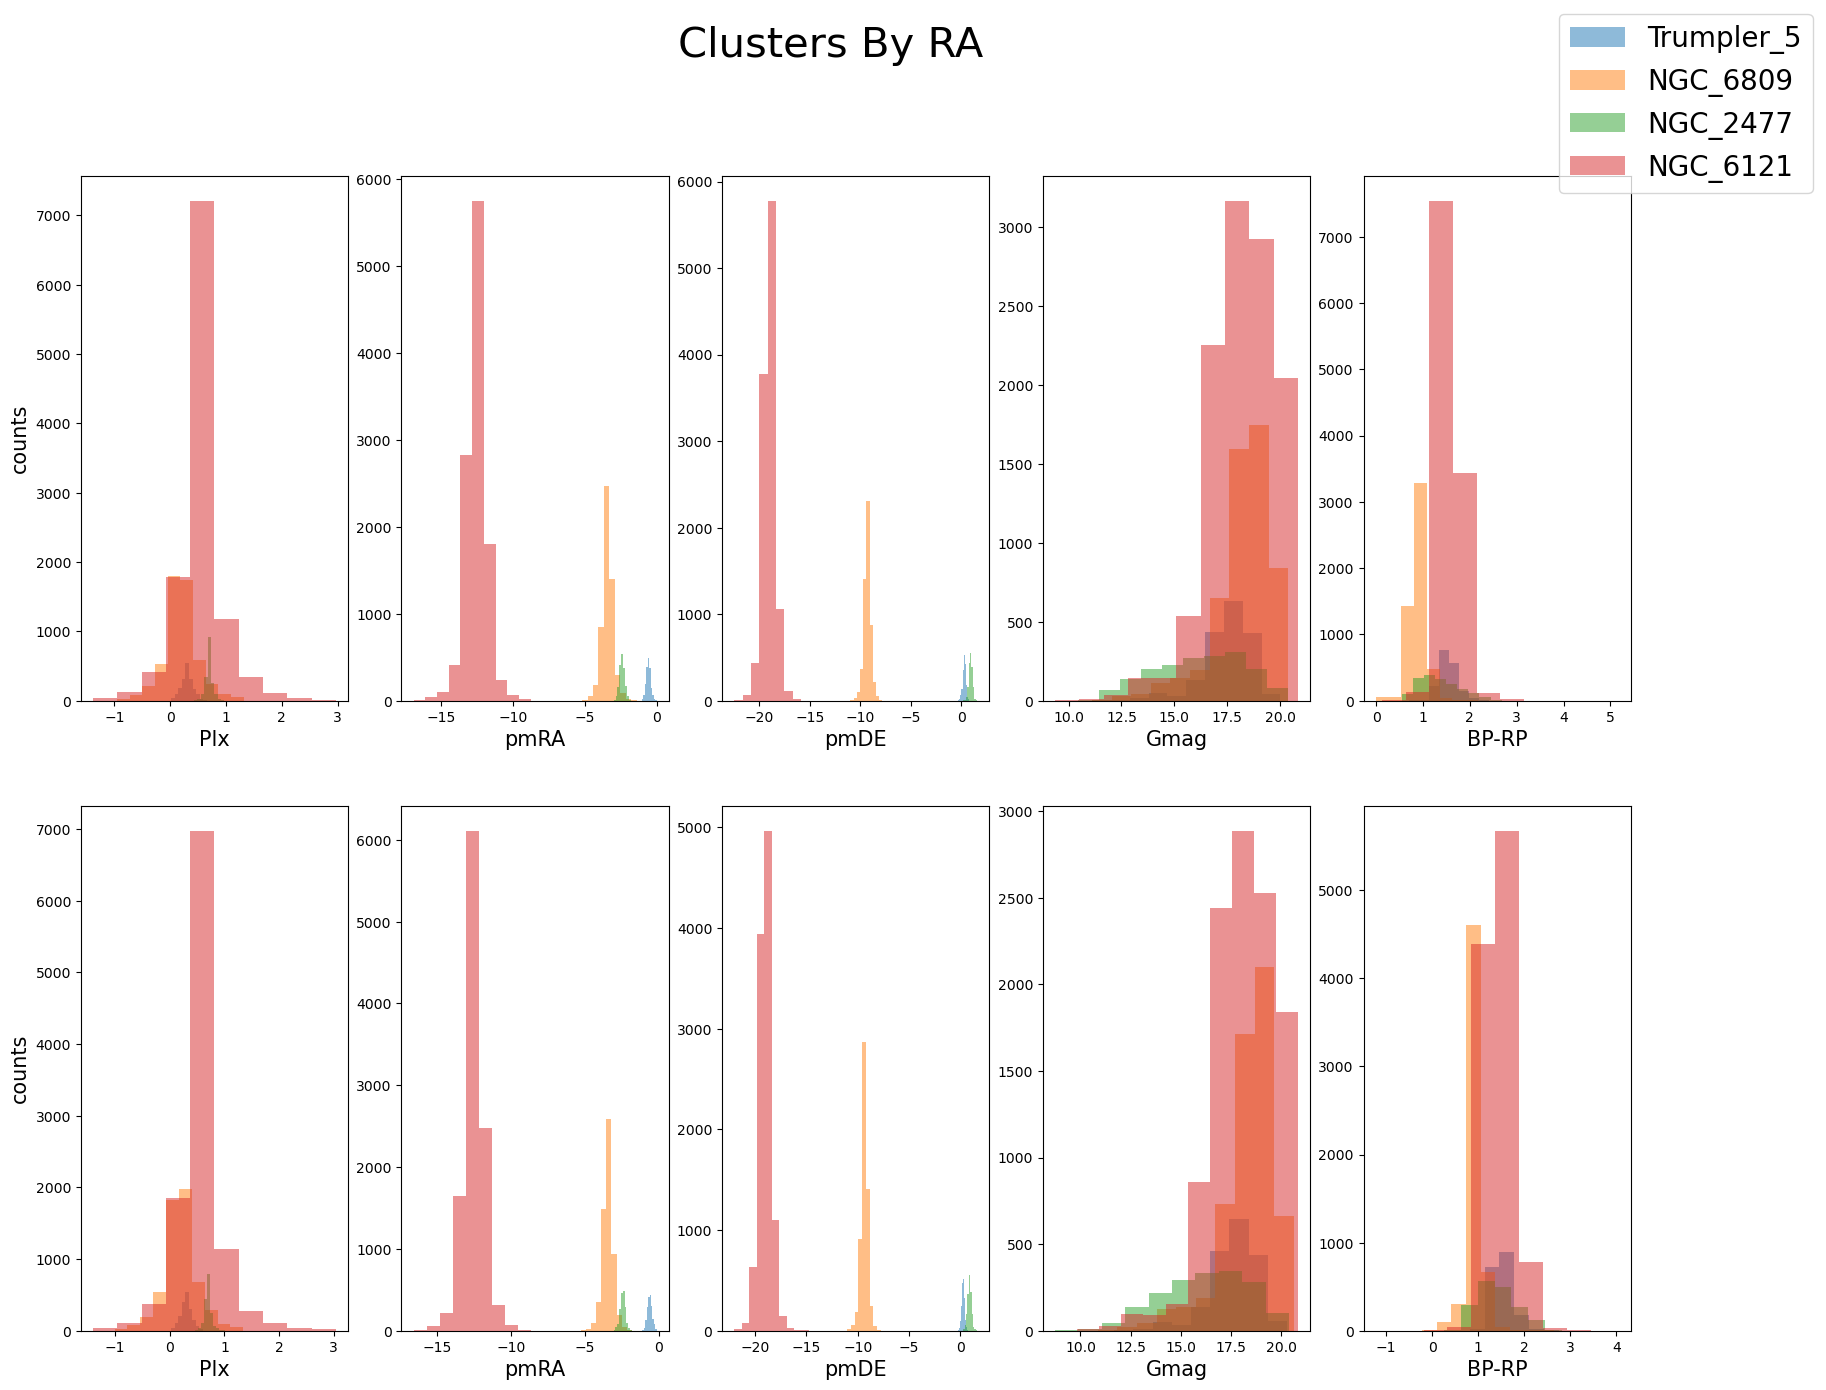

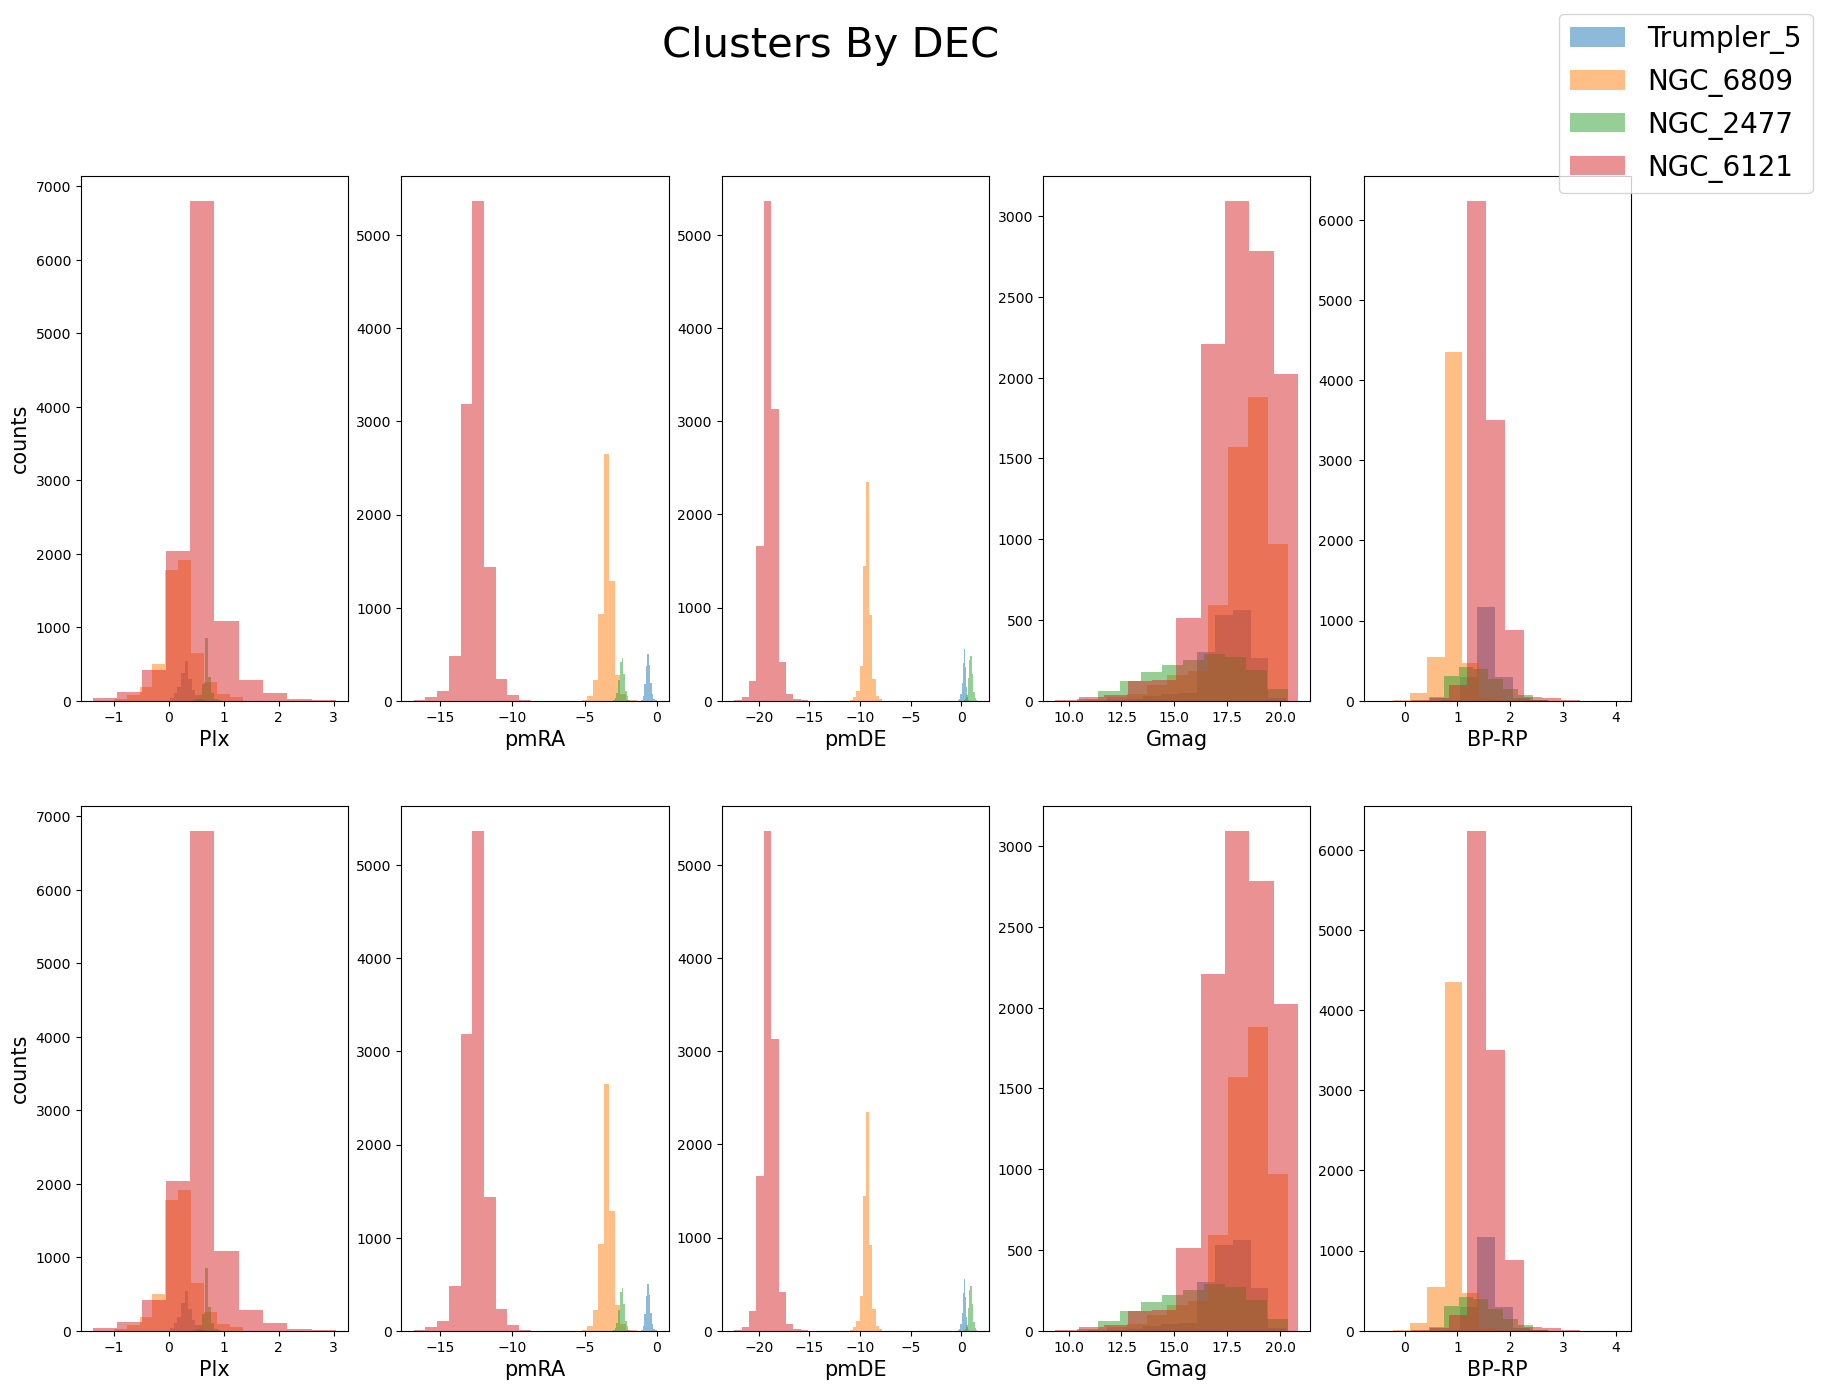

In [20]:
def four_sample_cluster_histrograms():
    cluster_list = [clusterA, clusterB, clusterC, clusterD]
    nclusters = 4
    nrows = 2
    ncols = 5
    fig, axes = plt.subplots(2, 5, figsize=(20, 15))
    label = ['Trumpler_5', 'NGC_6809','NGC_2477','NGC_6121']
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    bin_size = 20
    fig.suptitle('Clusters By RA', fontsize=30)
    #plot the RA data
    for k in range(nclusters):
        for i in range(nrows): ## y dimension of grid
            for j in range(ncols): ## x dimension of grid
                if i == 0:
                    axes[i,j].hist(cluster_list[k][0][:,j],alpha=0.5)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if i ==1:
                    axes[i,j].hist(cluster_list[k][1][:,j],alpha=0.5)
                    axes[i,0].set_ylabel('counts',fontsize=15)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if j == 0:
                    if i == j:
                       axes[i,j].set_ylabel('counts',fontsize=15)
    fig.legend(labels=label,fontsize=20)
    plt.show()

    #repeat for DEC
    fig, axes = plt.subplots(2, 5, figsize=(20, 15))
    bin_size = 20
    fig.suptitle('Clusters By DEC', fontsize=30)
    for k in range(nclusters):
        for i in range(nrows): ## y dimension of grid
            for j in range(ncols): ## x dimension of grid
                if i == 0:
                    axes[i,j].hist(cluster_list[k][2][:,j],alpha=0.5)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if i ==1:
                    axes[i,j].hist(cluster_list[k][3][:,j],alpha=0.5)
                    axes[i,0].set_ylabel('counts',fontsize=15)
                    axes[i,j].set_xlabel(data_labels[j],fontsize=15)
                if j == 0:
                    if i == j:
                       axes[i,j].set_ylabel('counts',fontsize=15)
    fig.legend(labels=label,fontsize=20)
    # handles, labels = ax1.get_legend_handles_labels()
    # fig.legend(handles, labels)
    plt.show()
    return 0
cluster_plot = four_sample_cluster_histrograms()

Parameter Values for Trumpler_5 by mean RA


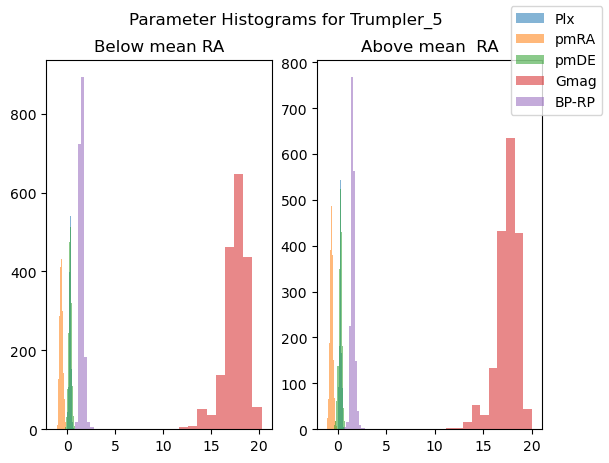

   T-stat    p-value
---------  ---------
-0.156629  0.875546
-2.43625   0.0148885
-0.635039  0.525443
 2.36919   0.0178795
-1.93409   0.0531801
Parameter Values for Trumpler_5 by mean DE


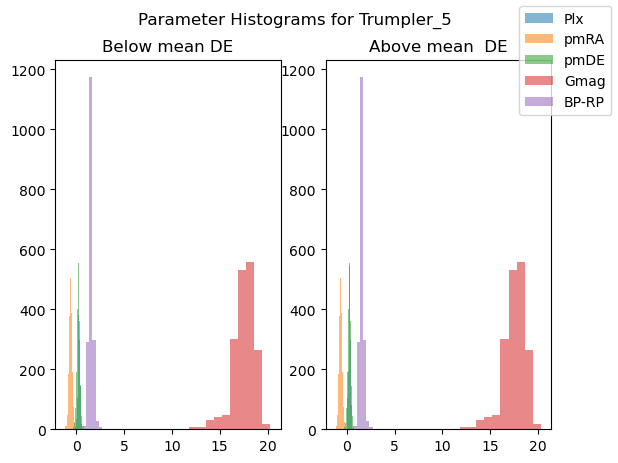

  T-stat    p-value
--------  ---------
       0          1
       0          1
       0          1
       0          1
       0          1


In [21]:
def t_test_arrays(array1_below, array2_after,cluster_name,coord):
    '''Compute a t_test for two arrays of equal size
    compute for  Plx, pmRA, pmDE, Gmag and BP-RP.
    input:
    array1_below, array2_after: np arrays with Plx, pmRA, pmDE, Gmag and BP-RP. in that order
        below: means for values below the mean RA or mean DEC
        after: means for values after or above the mean RA or mean DEC
    cluster_name: str Name of sampled cluster
    coord: str , RA or DEC for showing data seperated either by mean RA or mean DEC
    
    output:
    t_test table of results and pamameter histograms'''

    #there is probably a better way to assign these values

    plx_array1, pmRA_array1, pmDE_array1, Gmag_array1, BP_RP_array1 = array1_below[:,0], array1_below[:,1], array1_below[:,2], array1_below[:,3], array1_below[:,4]
    plx_array2, pmRA_array2, pmDE_array2, Gmag_array2, BP_RP_array2 = array2_after[:,0], array2_after[:,1], array2_after[:,2], array2_after[:,3], array2_after[:,4]

    #compute ttest for each parameter
    t_test_plx = sps.ttest_ind(plx_array1, plx_array2)
    t_test_pmra =  sps.ttest_ind(pmRA_array1, pmRA_array2)
    t_test_pmdec =  sps.ttest_ind(pmDE_array1, pmDE_array2)
    t_test_gmag=  sps.ttest_ind(Gmag_array1, Gmag_array2)
    t_test_bprp =  sps.ttest_ind(BP_RP_array1, BP_RP_array2)

    #make a table of results
    header= ['T-stat', 'p-value']
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    
    table_data = [t_test_plx, t_test_pmra, t_test_pmdec, t_test_gmag,t_test_bprp]
    print("Parameter Values for "+cluster_name+ " by mean "+coord)
    table_of_results = tabulate(table_data, headers=header)
    #this i took from atplotlib documentation
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Parameter Histograms for '+cluster_name)
    alpha= 0.55
    ax1.hist(plx_array1, alpha=alpha, label=data_labels[0])
    ax1.hist(pmRA_array1, alpha=alpha, label=data_labels[1])
    ax1.hist(pmDE_array1, alpha=alpha, label=data_labels[2])
    ax1.hist(Gmag_array1, alpha=alpha, label=data_labels[3])
    ax1.hist(BP_RP_array1, alpha=alpha, label=data_labels[4])
    ax1.set_title("Below mean "+coord)
    
    ax2.hist(plx_array2, alpha=alpha, label=data_labels[0])
    ax2.hist(pmRA_array2, alpha=alpha, label=data_labels[1])
    ax2.hist(pmDE_array2, alpha=alpha, label=data_labels[2])
    ax2.hist(Gmag_array2, alpha=alpha, label=data_labels[3])
    ax2.hist(BP_RP_array2, alpha=alpha, label=data_labels[4])
    ax2.set_title("Above mean  "+coord)

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels)
    plt.show()
    
    return table_of_results
    
Trumpler_RA = t_test_arrays(RA_above_data, RA_below_data,'Trumpler_5','RA')
print(Trumpler_RA)

Trumpler_DE = t_test_arrays(DE_above_data, DE_below_data,'Trumpler_5','DE')
print(Trumpler_DE)

In [22]:
clean_cluster.Name

217       Berkeley_36
219       Berkeley_39
221       Berkeley_43
1315    Collinder_110
1381       Czernik_41
            ...      
6059      Trumpler_25
6070       Trumpler_5
6091         UBC_1020
6124          UBC_106
6926           UFMG_2
Name: Name, Length: 85, dtype: object

In [23]:
def get_all_p_values(hiprob_clusters,stars):
    '''Obtain the p value for each cluster in plx, pmRA, pmDE, Gmag, BP-RP
    seperate by mean RA and mean DEC
    '''
    #this i got from chatgpt to find all the clusters within the clean clusters
    #find the clusters by name with more than 200 stars and low SD
    the_cluster = pd.merge(hiprob_clusters, stars, on='Name', how='left')
    #keep stars with high probability
    the_cluster = the_cluster[the_cluster['Prob'] > 0.8]

    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
 
    temp_df = the_cluster
    #calculate the means
    mean_RA = temp_df['RAdeg'].mean()
    mean_DE = temp_df['DEdeg'].mean()

    #find all the values of RA below and above the mean and split them into two dataframes
    RA_below_mean  = temp_df[temp_df['RAdeg'] < mean_RA]
    RA_above_mean  = temp_df[temp_df['RAdeg'] > mean_RA]
    #find the unqiue names in the lists

    
    
    #repeat for DEC
    DE_below_mean  = temp_df[temp_df['DEdeg'] < mean_DE]
    DE_above_mean  = temp_df[temp_df['DEdeg'] > mean_DE]

    #find all the unique names in the clean stars dataset
    my_cluster_names = pd.unique(temp_df.Name)
    #create a list to store the p values into by
    #plx, pmRA, pmDE, Gmag, BP-RP in that order
    p_values_array_RA =[[],[],[],[],[]]
    p_values_array_DE =[[],[],[],[],[]]
    #break appart t_test by RA and DEC append results into a list
    for cluster_names in my_cluster_names:
        
        #for each cluster find all the vlaues
        one_cluster_df = temp_df[temp_df['Name'] == cluster_names]
        mean_RA = one_cluster_df['RAdeg'].mean()
        mean_DE = one_cluster_df['DEdeg'].mean()

        RA_below_mean  = one_cluster_df[one_cluster_df['RAdeg'] < mean_RA]
        RA_above_mean  = one_cluster_df[one_cluster_df['RAdeg'] > mean_RA]

        DE_below_mean  = temp_df[temp_df['DEdeg'] < mean_DE]
        DE_above_mean  = temp_df[temp_df['DEdeg'] > mean_DE]


        a = RA_below_mean["Plx"]
        b = RA_above_mean["Plx"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[0].append(p_val)
        
        a = RA_below_mean["pmRA"]
        b = RA_above_mean["pmRA"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[1].append(p_val)
        
        a = RA_below_mean["pmDE"]
        b = RA_above_mean["pmDE"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[2].append(p_val)

        a = RA_below_mean["Gmag"]
        b = RA_above_mean["Gmag"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[3].append(p_val)

        a = RA_below_mean["BP-RP"]
        b = RA_above_mean["BP-RP"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_RA[4].append(p_val)
        #repeat for DEC
        a = DE_below_mean["Plx"]
        b = DE_above_mean["Plx"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[0].append(p_val)
        
        a = DE_below_mean["pmRA"]
        b = DE_above_mean["pmRA"]
        
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[1].append(p_val)
        
        a = DE_below_mean["pmDE"]
        b = DE_above_mean["pmDE"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[2].append(p_val)

        a = DE_below_mean["Gmag"]
        b = DE_above_mean["Gmag"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[3].append(p_val)

        a = DE_below_mean["BP-RP"]
        b = DE_above_mean["BP-RP"]
        t_test, p_val = sps.ttest_ind(a,b)
        p_values_array_DE[4].append(p_val)

    return p_values_array_RA, p_values_array_DE
p_values_ra, p_values_de =get_all_p_values(clean_cluster, stars)
#p_values_ra

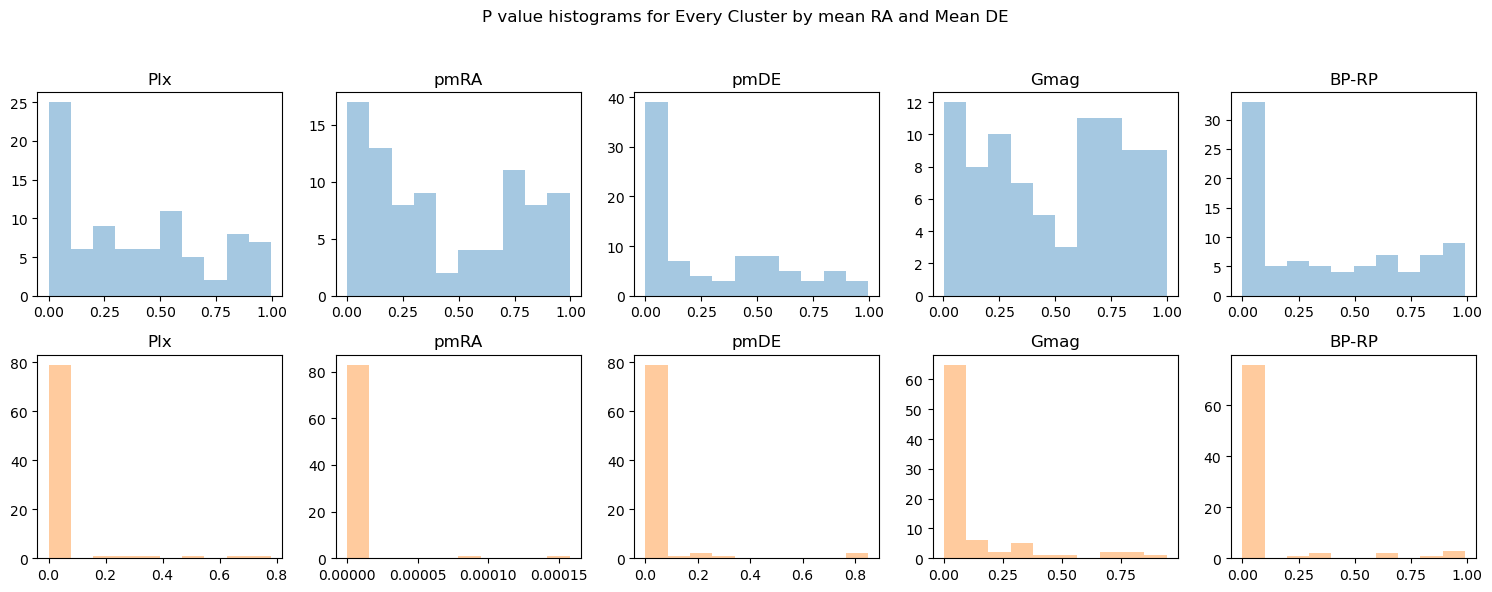

In [24]:
def make_p_value_histrograms(p_val_ra, p_val_de):
    #this template is from chatgpt and i modified it to accept the pvalue arrays
    data_labels = ['Plx', 'pmRA', 'pmDE', 'Gmag','BP-RP']
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('P value histograms for Every Cluster by mean RA and Mean DE')
    
    # Flatten the 2D array of subplots
    axes = axes.flatten()
    
    # Plot histograms for p_val_ra
    for i in range(len(p_val_ra)):
        axes[i].hist(p_val_ra[i], color='tab:blue', alpha=0.4)
        axes[i].set_title(data_labels[i])
    
    # Plot histograms for p_val_de
    for i in range(len(p_val_ra), len(p_val_ra)+5):
        axes[i].hist(p_val_de[i - 5], color='tab:orange', alpha=0.4)
        axes[i].set_title(data_labels[i - 5])

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    return None
yuh = make_p_value_histrograms(p_values_ra, p_values_de)

In [25]:
def Kolmogorov_Smirnov():
    

SyntaxError: incomplete input (3598791007.py, line 2)